# **Course One | Supervised Machine Learning**
This is couse one of three in this specialization. This course covers supervised learning (regression, and classification).

## **Week One | Introduction To Machine Learning**
Welcome to the Machine Learning Specialization! You're joining millions of others who have taken either this or the original course, which led to the founding of Coursera, and has helped millions of other learners, like you, take a look at the exciting world of machine learning!

**Learning Objectives:**
* Define machine learning
* Define supervised learning
* Define unsupervised learning
* Write and run Python code in Jupyter Notebooks
* Define a regression model
* Implement and visualize a cost function
* Implement gradient descent
* Optimize a regression model using gradient descent

## **Overview of Machine Learning**
**Videos:**
The videos were straight forward welcome to the course, and also showed some real life applications of the subject.

## **Supervised vs. Unsupervised Machine Learning**
**Videos:**
The videos first defined **_machine learning_** as the act of making the computer do something without it being explicitly programmed to do it, i.e the machine learnes by itself, hence the name. The videos also defined the two main branches of machine learning: supervised learning and unsuprvised learning, and defined each one and gave example application of each one. **_supervised learning_** is the type of machine learning in which the imput would be labelled data, unlike the unsupervised one, were the input is unlabelled data, and the algorithm needs to find patterns in the data(cluster them, or detect the anamoly). PCA is another example of unsupervised learning, which I do not know what it is yet, but I thought mentioning it would be good here. For the **_supervised learning_** part, there is two main branches of it: Regression, where the output is continious(predict income for example), and classification, where the output is discrete(cancer type detection for example). This section introduced Jupyter notebooks as well, but I won't talk about it since I have been using it for a while now.

**Quizes:**
Very straight forward two conceptual questions quiz.

## **Regression Model**
**Videos:**
The videos covered what linear regression is, and went into great details at that. The opyinal labs were great as well. Nothing to note here as I will go through the topic from scratch in code later.

**Quizes:**
Very straight forward two conceptual questions quiz.

## **Train The Model With Gradient Descent**
**Videos:**
The videos covered what grasient descent is, and went into great details at that, and gave great intuition to understand it, and then covered how the gradient descent solves the cost function minimzation problem from the linear regression section before it. The optinal labs were great as well. Nothing to note here as I will go through the topic from scratch in code later.

**Quizes:**
Very straight forward two conceptual questions quiz.

## **implementing A linear Regression Model From Scratch | A Side Quest:**

### Problem Statement:
Here we have a dataset of the population of a ctiy vs the net profit, and we are trying to predict the profit for any population:

In [1]:
# Importing the relevant modules:

from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Loading the dataset:
df = pd.read_csv('../../Datasets/bike_sharing_data.txt')

In [3]:
# Examining the dataset:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# df.describe() # Uncomment to examine the data more
# df.info()

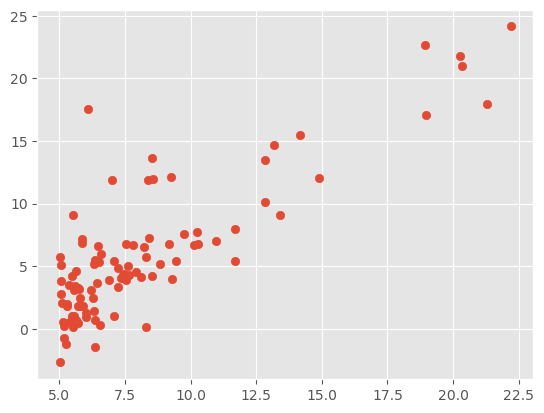

In [5]:
# Visualizing the data:
plt.scatter(df.Population, df.Profit)

* The data looks suitable for linear regression, so here I start with it:
* The optimum line will take the form  of w*x+b, where I need to optimize the w, and b values to give the best fit(minimze the error).

In [6]:
x_train = df.Population # The Feature
y_train = df.Profit     # The Target

### Computing The Cost:

In [7]:
# computing the cost function:
def cost(x,y,w,b):
    ''' This function computes the cost function ,
    Args:
    x: Feature data
    y: Target Data
    w: Parameter
    b: Parameter
    '''
    cost = 0
    m = len(x_train)
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    
    total_cost = cost / (2*m)
    
    return total_cost

### Computing The Derivitives:

In [8]:
# Computing the derivitives:
def gradients(x,y,w,b):
    ''' This function computes the cost function ,
    Args:
    x: Feature data
    y: Target Data
    w: Parameter
    b: Parameter
    '''
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    
    return dj_dw, dj_db

### Implementing The Gradient Descent Algorithm:

In [9]:
# Implementing the gradient descent alforithm:
def gradient_descent(w,b,alpha,itr):
    ''' This function employs the gradient descent algorithm
    Args:
    w, b: parameters
    alpha: learning rate
    gradients: the derivitive of the cost w.r.t w and b, respectively
    itr: The number of iterations
    '''
    j_history = [] # Saving the cost function values history for plotting later on
    for i in range(itr):
        djdw, djdb = gradients(x_train,y_train,w,b)
        w = w - alpha * djdw
        b = b - alpha * djdb
        
        if i<100000:      # prevent resource exhaustion 
            j_history.append( cost(x_train, y_train, w , b))
            
        if i% ceil(itr/10) == 0:   # prints 10 iterations or all of them if they're < 10
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {djdw: 0.3e}, dj_db: {djdb: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b , j_history

### Putting It All Together:

In [10]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.01
# run gradient descent
w_final, b_final, j_hist = gradient_descent(w_init, b_init, tmp_alpha, 
                                                    iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 6.74e+00  dj_dw: -6.533e+01, dj_db: -5.839e+00   w:  6.533e-01, b: 5.83914e-02
Iteration 1000: Cost 4.52e+00  dj_dw: -1.185e-02, dj_db:  1.180e-01   w:  1.127e+00, b:-3.24258e+00
Iteration 2000: Cost 4.48e+00  dj_dw: -1.951e-03, dj_db:  1.942e-02   w:  1.182e+00, b:-3.78826e+00
Iteration 3000: Cost 4.48e+00  dj_dw: -3.211e-04, dj_db:  3.196e-03   w:  1.191e+00, b:-3.87808e+00
Iteration 4000: Cost 4.48e+00  dj_dw: -5.285e-05, dj_db:  5.261e-04   w:  1.193e+00, b:-3.89287e+00
Iteration 5000: Cost 4.48e+00  dj_dw: -8.699e-06, dj_db:  8.659e-05   w:  1.193e+00, b:-3.89530e+00
Iteration 6000: Cost 4.48e+00  dj_dw: -1.432e-06, dj_db:  1.425e-05   w:  1.193e+00, b:-3.89570e+00
Iteration 7000: Cost 4.48e+00  dj_dw: -2.357e-07, dj_db:  2.346e-06   w:  1.193e+00, b:-3.89577e+00
Iteration 8000: Cost 4.48e+00  dj_dw: -3.880e-08, dj_db:  3.862e-07   w:  1.193e+00, b:-3.89578e+00
Iteration 9000: Cost 4.48e+00  dj_dw: -6.386e-09, dj_db:  6.356e-08   w:  1.193e+00, b:-3.89578e+00


### Plotting The Results:

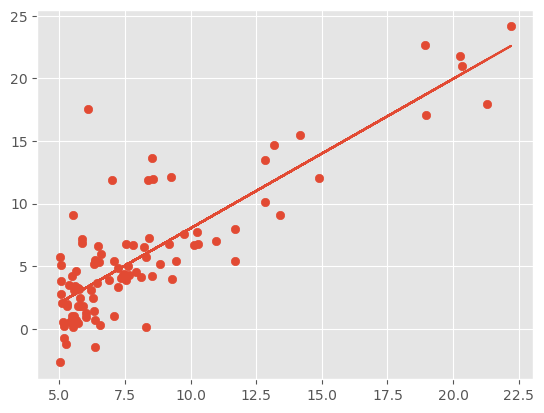

In [11]:
plt.scatter(x_train,y_train)
plt.plot(x_train, w_final*x_train + b_final)

### PLotting the convergence:

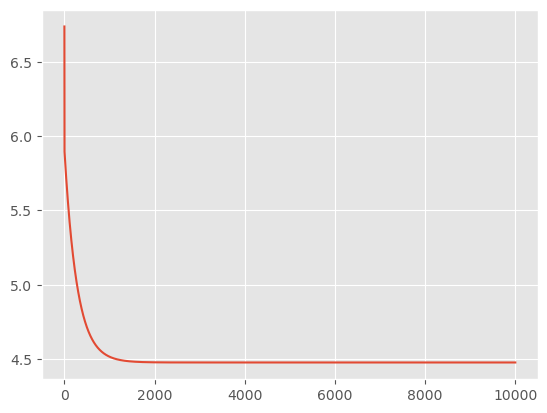

In [12]:
plt.plot(range(iterations), j_hist)

### Inference Using Our Optimized Model:

In [13]:
# Creating a basic prediction function:
profit_func = lambda population: w_final * population + b_final 

In [14]:
population = 13.21
profit = profit_func(population)

print(f'Given a population of {population} million people, the model predicts a profit of {profit:.2f} million dollars')

Given a population of 13.21 million people, the model predicts a profit of 11.86 million dollars


### Notes & Tips:

* You can play around with the learning rate to see what happens when it is too high or too low. Examine the output of the gradient descent algorithm and see the convergence curve.

* The optional labs in the course have many great visualizations and interactive plots, so go there to see more, for I didn't do everything in between as I am not teaching, just implementing.

* I didn't prettify the plots since this is just for me, but I can always put the titles and the labels later.

* All of this can be done with three lines of code using machine learning libraries, but I am implementing it from the ground up for learning purpuses, so none of this is ever used in practice, and that's another reason why I didn't focus on producing great graphs and so on.

## **Week Two| Regression With Multiple Input Variables**
This week, you'll extend linear regression to handle multiple input features. You'll also learn some methods for improving your model's training and performance, such as vectorization, feature scaling, feature engineering and polynomial regression. At the end of the week, you'll get to practice implementing linear regression in code.

**Learning Objectives:**
* Use vectorization to implement multiple linear regression
* Use feature scaling, feature engineering, and polynomial regression to improve model training
* Implement linear regression in code

## **Multiple Linear Regression**
**Videos:**
The videos expanded on the concept of linear regression and gradient descent to the general situation where you have multiple features to get information from. The videos first covered vectorization, which is a way of doing computations in a manner that the CPU or GPU applies parralel computing to speed up the computaions, and also the code is much shorter when this method is used. The optional labs were great, as always. The first one is good resource for the relevant numpy used in this cource, and an example of the time difference when employing the vectorization vs the for loop implementation were shown.

**Quizes:**
Very straight forward three conceptual questions quiz.

* Note that there is no need for me to reimplement what I just did earlier(simple linear regressio from scratch) because there isn't much of a difference. The methodology remains exactly the same, but the extra thing to take care of is when applying the gradient descent algorith, you need a new for loop to take the new features into account. Also, everything is in the optional labs, so if I ever need to revisit the concepts, I should go there.

## **Gradient Descent In practice**
**Videos:**
The videos first covered feature scaling, then choosing the learning rate, and then feature engineering and finally polynomial regression. There were two practical labs that the first coverd non-linear regression using linear regression after engineering the features. The second lab were about sklearn, and how we do linear regression in practice. This week is mostly practical. The assignment for this week was what I have already coded in the first week.

**Quizes:**
Very straight forward, mostly conceptual, quiz.

## **CS299 | Stanford University**
I will be studying <a href="https://www.youtube.com/watch?v=jGwO_UgTS7I&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU">this cource</a> from stanford alongside this specialization to get a better feel for the theory.
### **Lecture One:**
In this lecture, the focus was to introduce the subject and give a general feel of machine learning. Nothing new.
### **Lecture Two:**
This lecture covered linear regression, and following are he notes:
* Batch gradient descent computes the sum each time the loop is executed, and that takes too much time if the dataset is large.
* Stochastic gradient descent solves the problem above.
* In practice, the libraries implementing linear regression use the normal equation, which computes the exact parameters in one step compared to the gradient descent which optimizes the parameters with iterarions.
* The gradient descent is used in many learning algorithms not just linear regression.
* New vector notation was covered.

**I will be commenting on all the lectures here, but not at the same time. Therefore, I will be getting back here every once in a while.**
### **Lecture Three:**
The following is 7/1/2023 notes:
* The locally weighted linear regression is used when you don't know what features to use because this method weighs every feature proportionately to where you want to locally evaluate.
* This lecture covered the mathematical derivations of the methods learned before.
* There is no normal equation for logistic regression or anything similar, so we have to use algorithms.
* The newoton's algorithm were covered, and it converges smuch faster than the gradient descent when the parameters are a few, but it is slower when the parameter number is large because of the computaion of the inverse of the hessian.

## **Week Three | Classification**
This week, you'll learn the other type of supervised learning, classification. You'll learn how to predict categories using the logistic regression model. You'll learn about the problem of overfitting, and how to handle this problem with a method called regularization. You'll get to practice implementing logistic regression with regularization at the end of this week!

**Learning Objectives:**
* Use logistic regression for binary classification
* Implement logistic regression for binary classification
* Address overfitting using regularization, to improve model performance

## **Classification With Logistic Regression**
**Videos:**
The videos first covered the motivation behind logistic regression, and then tried to solve the classification problem using regular linear regresssion, and showed how it fails to do that when outliers are present bdecause the decesion boundry is very susseptple to ouitliers. Then, the videos cobered the sigmoid function and , then the logistic regression using the sigmoid function, and then covered the decision bounsdry. There were three labs, and all of themj had great conceptual demos.

**Quizes:**
Very straight forward, mostly conceptual, quiz.

## **Cost Function With Logistic Regression**
**Videos:**
The videos covered the problem of determining a cost function to optimize the logistic regression problem, and the resuting cost function turned out to be convex, so the gradient descent is easily applied to it. The practice labs gave great intuition as always. Below is the code for coomputing the cost function in code:

**Quizes:**
Very straight forward, mostly conceptual, quiz.

In [15]:
# Computing the cost function:
def compute_cost_logistic(x,y,w,b):
    ''' This function computes the cost function of the logistic regression algorithm,
        Args:
        x: The training set
        y: The target set
        w: Parameter
        b: Parameter
        '''
    m = x.shape[0]
    cost = 0.0
    
    for i in range(m):
        z = np.dot(x[i],w) + b
        f_wb = 1 / (1 + np.exp(-z))
        cost +=  -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    cost = cost / m
    return cost

Check the implementation of the cost function using the two cells below:

In [16]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

In [17]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


## **Gradient Descent For Logistic Regression**
**Videos:**
The videos covered how to apply the gradient descent algorithm to logistic regression proplems in order to minimize the cost function, and the labs shoed how to do that in code, one with basic python and numpy, and the other with sklearn. Below is the coded algorithm from the ground up, and I will do some projects using sklearn later in a seperate notebook. Note that the first lab has a great visualization demo in its end.

**Quizes:**
Very straight forward, mostly conceptual, quiz.

In [18]:
def compute_gradient_logistic(x,y,w,b):
    ''' Computes the gradients for the logistic regression
        
        Args:
        x (ndarray(m,n)) : the training set with m examples and n features
        y (ndarray(m,)) : the target set with m examples
        w (ndarray(n,) : model parameter
        b (scaler) : model parameter
        
        Returns:
        dj_dw (ndarray(n,)) : the gradient of j w.r.t w
        df_db (scaler) : the gradient of j w.r.t b
        '''
    m = x.shape[0]
    n = x.shape[1]
    
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    
    for i in range(m):
        z = np.dot(x[i],w) + b
        f_wb = 1 / (1 + np.exp(-z))
        dj_db += f_wb - y[i]
        
        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * x[i,j]
            
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m 
    
    return dj_db, dj_dw  

Check the implementation of the gradient function using the cell below.

In [19]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [20]:
# Computing the gradient descent:
import copy
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


Let's run gradient descent on our data set.

In [21]:
import math
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


## **The Problem Of Overfitting**
**Videos:**
The videos covered the problem of overfitting and how to solve it using the three main methods to do so:
1. Add more data
2. feature selection
3. regularication

The videos and the labs focused mainly on regularization since it is the most practical for you are mostly given a static set of data for example. The first lab had a great demo for the intuition behind the problem of overfitting.

**Quizes:**
Very straight forward, mostly conceptual, quiz.